# Simulate a Gaussian random vector with SVD decomposition

In this document, we present the simulation of a random vector with arbitrary marginals and Gaussian copula. We assume that this copula does not necessarily have a full rank covariance matrix. We use the SVD decomposition to simulate the correlated Gaussian random vector.

## Introduction

The multivariate normal distribution of a k-dimensional random vector $\boldsymbol{X} = (X_1,\ldots,X_k)^T$ can be written in the following notation:

$$
\boldsymbol{X}\ \sim\ \mathcal{N}(\boldsymbol{\mu},\, \Sigma),
$$

where $\boldsymbol{\mu} \in \mathbb{R}^k$ is the mean vector and $\Sigma \in \mathbb{R}^{k\times k}$ is the covariance matrix.

## Definition

A real random vector $\boldsymbol{X} = (X_1,\ldots,X_k)^{\mathrm T}$ is called a normal random vector if there exists a random vector $\boldsymbol{Z} \in \mathbb{R}^r$, which is a standard normal random vector, a vector $\boldsymbol{\mu} \in\mathbb{R}^k$, and a matrix $A \in\mathbb{R}^{k\times r}$, such that 

$$
\boldsymbol{X} = \boldsymbol{\mu} + A \boldsymbol{Z}
$$

and the covariance matrix is $\Sigma = A A^{\mathrm T}$.

If $\Sigma$ is not full rank, i.e. if $r < k$, therefore there is no density function. In this case, we may still define a matrix $A \in \mathbb{R}^{k\times k}$, but any arbitrary vector $\boldsymbol{Z}$ in the null space of $A$ would lead a zero $A \boldsymbol{Z}$ product. Moreover, the Cholesky decomposition of $\Sigma$ does not exist.

## Simulation with the SVD

Let $U, \Delta, V \in\mathbb{R}^k$ be such that :

$$
\Sigma = U \Delta V^T
$$

where $U$ and $V$ are orthogonal, $\Delta$ is diagonal. 

The transpose of the previous equation is:

$$
\Sigma = \Sigma^T = V \Delta U^T
$$

because $\Sigma$ is symmetric. 

Hence 

$$
V = U
$$

which implies:

$$
\Sigma = U \Delta U^T.
$$

Let $\Lambda$ be the diagonal matrix which components are the square roots of the singular values in $\Delta$:

$$
\Sigma = U \Lambda^2 U^T.
$$

Let $\boldsymbol{Z} \in \mathbb{R}^k$ be the random vector with independent marginals, such that :

$$
Z_i \sim \mathcal{N}(0, 1)
$$

for $i=1,\ldots, k$. 

Therefore, 

$$
\boldsymbol{X} = \boldsymbol{\mu} + U \Lambda \boldsymbol{Z} \sim \mathcal{N}(\boldsymbol\mu,\, \Sigma).
$$

Indeed, it is easy to check that the mean is $\boldsymbol{\mu}$. 
Moreover covariance matrix is:

$$
\textrm{Cov}[\boldsymbol{X}] = \textrm{Cov}[U \Lambda \boldsymbol{Z}] = U \Lambda \textrm{Cov}[ \boldsymbol{Z}] \Lambda^T U^T = U \Lambda^2 U^T = \Sigma.
$$

In [1]:
import openturns as ot
import openturns.viewer as otv
import numpy as np

In [2]:
ot.__version__

'1.17'

In [3]:
def view_sample(sample, title, figure_size=5.0):
    graph = ot.VisualTest.DrawPairs(sample)
    graph.setTitle(title)
    figure = otv.View(graph).getFigure()
    figure.set_figheight(figure_size)
    figure.set_figwidth(figure_size)
    return graph

In [4]:
ot.RandomGenerator.SetSeed(77)

In [5]:
# Liste des marginales
marginal_collection = [ot.Normal(3.0, 2.0), ot.Uniform(-3.0, -1.0)]

In [6]:
# Dépendance
R = ot.CorrelationMatrix(2, [1.0, 1.0, 1.0, 1.0])
R

class=CorrelationMatrix dimension=2 implementation=class=MatrixImplementation name=Unnamed rows=2 columns=2 values=[1,1,1,1]

In [7]:
#  copula = ot.NormalCopula(R)
#  distribution = ot.ComposedDistribution(marginal_collection, copula)

```
TypeError: InvalidArgumentException : The correlation matrix must be definite positive
```

## Using Cholesky decomposition

In [8]:
dimension = R.getDimension()
# Generate a realization without correlation
Z_distribution = ot.Normal(dimension)
z_decorrelated = Z_distribution.getRealization()
# Compute correlated Normal realization
#  L = R.computeCholesky()

```
RuntimeError: InternalException : Error: the matrix is not definite positive.
```

## Using SVD with a full-rank R

In [9]:
R = ot.CorrelationMatrix(2, [1.0, 0.5, 0.5, 1.0])
R

class=CorrelationMatrix dimension=2 implementation=class=MatrixImplementation name=Unnamed rows=2 columns=2 values=[1,0.5,0.5,1]

In [10]:
singular_values, U, VT = R.computeSVD(True)
singular_values

class=Point name=Unnamed dimension=2 values=[1.5,0.5]

In [11]:
U

class=Matrix implementation=class=MatrixImplementation name=Unnamed rows=2 columns=2 values=[-0.707107,-0.707107,-0.707107,0.707107]

In [12]:
VT

class=Matrix implementation=class=MatrixImplementation name=Unnamed rows=2 columns=2 values=[-0.707107,-0.707107,-0.707107,0.707107]

In [13]:
dimension = R.getDimension()
Sigma = ot.Matrix(dimension, dimension)
for i in range(singular_values.getSize()):
    Sigma[i, i] = singular_values[i]
Sigma

class=Matrix implementation=class=MatrixImplementation name=Unnamed rows=2 columns=2 values=[1.5,0,0,0.5]

Recover R

In [14]:
U * Sigma * VT

class=Matrix implementation=class=MatrixImplementation name=Unnamed rows=2 columns=2 values=[1,0.5,0.5,1]

In [15]:
Sigma_inverse = ot.Matrix(dimension, dimension)
for i in range(singular_values.getSize()):
    Sigma_inverse[i, i] = 1.0 / singular_values[i]
Sigma_inverse

class=Matrix implementation=class=MatrixImplementation name=Unnamed rows=2 columns=2 values=[0.666667,0,0,2]

In [16]:
U * Sigma_inverse * VT

class=Matrix implementation=class=MatrixImplementation name=Unnamed rows=2 columns=2 values=[1.33333,-0.666667,-0.666667,1.33333]

Check.

In [17]:
identity = ot.IdentityMatrix(dimension)
inverseR = R.solveLinearSystem(identity)
inverseR

class=Matrix implementation=class=MatrixImplementation name=Unnamed rows=2 columns=2 values=[1.33333,-0.666667,-0.666667,1.33333]

### Compute Cholesky in full rank case with SVD

In [18]:
Sigma_pseudo_root_inverse = ot.Matrix(dimension, dimension)
for i in range(singular_values.getSize()):
    if abs(singular_values[i]) != 0.0:
        Sigma_pseudo_root_inverse[i, i] = 1.0 / np.sqrt(singular_values[i])
Sigma_pseudo_root_inverse

class=Matrix implementation=class=MatrixImplementation name=Unnamed rows=2 columns=2 values=[0.816497,0,0,1.41421]

In [19]:
U

class=Matrix implementation=class=MatrixImplementation name=Unnamed rows=2 columns=2 values=[-0.707107,-0.707107,-0.707107,0.707107]

In [20]:
R.computeCholesky()

class=TriangularMatrix dimension=2 implementation=class=MatrixImplementation name=Unnamed rows=2 columns=2 values=[1,0.5,0,0.866025]

## Using SVD with a degenerate rank R

In [21]:
R = ot.CorrelationMatrix(2, [1.0, 1.0, 1.0, 1.0])
R

class=CorrelationMatrix dimension=2 implementation=class=MatrixImplementation name=Unnamed rows=2 columns=2 values=[1,1,1,1]

In [22]:
singular_values, U, VT = R.computeSVD(True)
singular_values

class=Point name=Unnamed dimension=2 values=[2,0]

In [23]:
U

class=Matrix implementation=class=MatrixImplementation name=Unnamed rows=2 columns=2 values=[-0.707107,-0.707107,-0.707107,0.707107]

In [24]:
VT

class=Matrix implementation=class=MatrixImplementation name=Unnamed rows=2 columns=2 values=[-0.707107,-0.707107,-0.707107,0.707107]

In [25]:
dimension = R.getDimension()
Sigma = ot.Matrix(dimension, dimension)
for i in range(singular_values.getSize()):
    Sigma[i, i] = singular_values[i]
Sigma

class=Matrix implementation=class=MatrixImplementation name=Unnamed rows=2 columns=2 values=[2,0,0,0]

Recover R

In [26]:
U * Sigma * VT

class=Matrix implementation=class=MatrixImplementation name=Unnamed rows=2 columns=2 values=[1,1,1,1]

In [27]:
# Simulation pas à pas
class NormalRandomVector(ot.PythonRandomVector):
    def __init__(self, marginal_collection, R):
        """
        Create a Normal random vector.
        
        Parameters
        ----------
        marginal_collection : list
            The list of univariate marginals.
        R : ot.CorrelationMatrix
            The correlation matrix
        """
        dimension = len(marginal_collection)
        if R.getDimension() != dimension:
            raise ValueError(
                "Dimension of correlation matrix is %d, "
                "which is different from the number of "
                "marginal distributions."
                % (R.getDimension())
            )
        super(NormalRandomVector, self).__init__(dimension)
        self.R = R
        self.marginal_collection = marginal_collection
        # Compute correlated Normal realization
        self.singular_values, self.U, self.VT = R.computeSVD(True)
        self.dimension = R.getDimension()
        

    def getRealization(self):
        """
        Generate a new realization with Gaussian copula.

        Uses the SVD decomposition of R. 
        This implementation works even if the covariance matrix 
        is degenerate. 
        The point is generated by computing the quantile of the 
        CDF of the Gaussian correlated random vector.

        Returns
        -------
        x_correlated : ot.Point()
            The point with given correlation and marginals. 
        """
        # Generate a realization without correlation
        Z_distribution = ot.Normal(self.dimension)
        z_decorrelated = Z_distribution.getRealization()
        # Compute correlated Normal realization
        # Compute square root of the singular values
        Sigma_root = ot.Matrix(self.dimension, self.dimension)
        for i in range(self.singular_values.getSize()):
            Sigma_root[i, i] = np.sqrt(self.singular_values[i])
        # Generate the correlated Gaussian random vector
        z_correlated = self.U * (Sigma_root * z_decorrelated)
        # Apply marginals
        x_correlated = ot.Point(self.dimension)
        for i in range(self.dimension):
            marginal = marginal_collection[i]
            cdf = ot.Normal().computeCDF(z_correlated[i])
            x_correlated[i] = marginal.computeQuantile(cdf)[0]
        return x_correlated
    
    def getSample(self, size):
        """
        Generate a sample with Gaussian copula.

        Parameters
        ----------
        size : int
            The size of the sample.

        Returns
        -------
        sample : ot.Sample(size, dimension)
            The sample.
        """
        sample = ot.Sample(size, self.dimension)
        for i in range(size):
            sample[i] = self.getRealization()
        return sample

In [28]:
ot.RandomGenerator.SetSeed(77)
nrv = NormalRandomVector(marginal_collection, R)
randomvector = ot.RandomVector(nrv)

# Generate a sample
sample_size = 100
sample = randomvector.getSample(sample_size)

/home/devel/miniconda3/envs/otsupgalilee/lib/python3.8/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/devel/miniconda3/envs/otsupgalilee/lib/python3.8/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


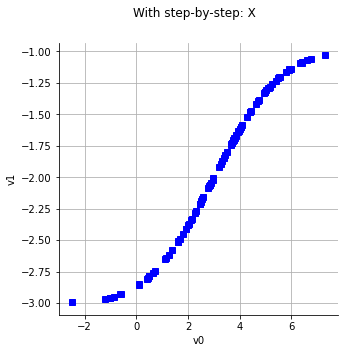

In [29]:
graph = view_sample(sample, "With step-by-step: X")

## A simple degenerate Gaussian random vector in 3 dimensions

In [33]:
dimension = 3
R = ot.CorrelationMatrix(3)
R[0, 1] = 1.0
R

class=CorrelationMatrix dimension=3 implementation=class=MatrixImplementation name=Unnamed rows=3 columns=3 values=[1,1,0,1,1,0,0,0,1]

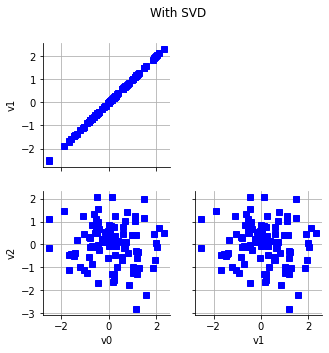

In [35]:
marginal_collection = [ot.Normal()] * dimension

sample_size = 100
nrv = NormalRandomVector(marginal_collection, R)
randomvector = ot.RandomVector(nrv)
sample = randomvector.getSample(sample_size)
graph = view_sample(sample, "With SVD")